## Covered Interest Parity (CIP) Arbitrage Replication
This contains steps to replicate the arbitrage referencing below

<small> **Source:**
Du, W., & Schreger, J. (2023). *Covered Interest Parity Deviations: Macro Risks and Market Frictions*. Harvard Business School.
[Link to paper](https://www.hbs.edu/ris/Publication%20Files/24-030_1506d32b-3190-4144-8c75-a2326b87f81e.pdf)


## Load and Format Data (Replication)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
import sys
import os
from pathlib import Path
PROJECT_ROOT = Path.cwd().parents[0]
SRC_PATH = PROJECT_ROOT / "src"
if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))
import pull_bloomberg_cip_data
import cip_analysis
import importlib
import settings

<small> For our analysis of Covered Interest Rate Parity (CIP) deviations in G10 currencies against the USD, we collect data from January 2010 onwards using Excel as our secondary data source, orginally from bloomberg. The dataset incorporates spot exchange rates, 3-month forward rates, and Overnight Index Swap (OIS) rates for eight major currencies: AUD, CAD, CHF, EUR, GBP, JPY, NZD, and SEK. We use OIS as our benchmark risk-free rate to ensure consistency with other arbitrage spread analyses. Our implementation handles the different quotation conventions, with appropriate scaling of forward points and conversion to reciprocal rates for currencies conventionally quoted in USD-per-foreign-currency terms (EUR, GBP, AUD, NZD). This comprehensive dataset allows us to calculate CIP deviations according to the formula.



<small>

First, we will load the raw data. If you are utilizing a Bloomberg Terminal, set:

```python
input_excel = False

and the function will pull from bloomberg itself rather than a loaded excel file

In [2]:
df_raw_replicate = pull_bloomberg_cip_data.load_raw(end = '2020-01-01')
display(df_raw_replicate)

,AUD_CURNCY,CAD_CURNCY,CHF_CURNCY,EUR_CURNCY,GBP_CURNCY,JPY_CURNCY,NZD_CURNCY,SEK_CURNCY,AUD_CURNCY3M,CAD_CURNCY3M,...,SEK_CURNCY3M,AUD_IR,CAD_IR,CHF_IR,EUR_IR,GBP_IR,JPY_IR,NZD_IR,SEK_IR,USD_IR
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.095650,1.0416,1.0300,0.693866,0.621659,92.51,1.361656,7.0507,1.106054,1.041585,...,7.047486,3.90000,0.25250,-0.1315,0.3850,0.4465,0.0975,2.56100,0.2530,0.16200
2010-01-05,1.096611,1.0390,1.0334,0.696136,0.625313,91.71,1.361285,7.1090,1.107072,1.038995,...,7.105937,3.90000,0.26500,-0.1350,0.3790,0.4480,0.0975,2.53675,0.2600,0.15500
2010-01-06,1.087193,1.0324,1.0275,0.693963,0.624376,92.33,1.355381,7.0732,1.097580,1.032415,...,7.070264,3.91000,0.26400,-0.1300,0.3770,0.4455,0.0975,2.54500,0.2515,0.14600
2010-01-07,1.089918,1.0347,1.0341,0.698910,0.627628,93.37,1.366120,7.1291,1.100576,1.034725,...,7.126259,3.95000,0.26200,-0.1285,0.3730,0.4425,0.0980,2.54500,0.2550,0.14500
2010-01-08,1.081432,1.0299,1.0239,0.693914,0.624025,92.66,1.357773,7.0752,1.091894,1.029915,...,7.072649,3.95500,0.25400,-0.1225,0.3710,0.4430,0.0980,2.54500,0.2550,0.14300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,1.439885,1.3123,0.9812,0.901063,0.769408,109.65,1.499250,9.4148,1.436798,1.311376,...,9.367829,0.68688,1.74000,-0.7350,-0.4200,0.7010,-0.0525,0.98980,-0.0250,1.56795
2019-12-27,1.432665,1.3078,0.9755,0.894775,0.764584,109.45,1.493875,9.3395,1.429531,1.306972,...,9.297510,0.68500,1.74000,-0.7350,-0.4453,0.6996,-0.0544,0.98980,-0.0250,1.56585
2019-12-30,1.429797,1.3069,0.9694,0.892937,0.762660,108.88,1.486326,9.3485,1.426666,1.306266,...,9.307662,0.68063,1.73395,-0.7300,-0.4443,0.6987,-0.0550,0.98810,-0.0250,1.56365


<small>
Process in cleaning raw data:

- Converted forward points to actual forward rates
- Applied scaling factors: per 10,000 for most currencies, per 100 for JPY
- Standardized EUR, GBP, AUD, and NZD to USD-per-foreign-currency format
- Performed reciprocal conversion using 1.0 / original rate
- Applied conversion to both spot and forward values

<small> Next we will calculate the CIP arbitrage spreads

In [3]:
cip_table_replicate = pull_bloomberg_cip_data.compute_cip(end = '2020-01-01')
display(cip_table_replicate)

,CIP_AUD_ln,CIP_CAD_ln,CIP_CHF_ln,CIP_EUR_ln,CIP_GBP_ln,CIP_JPY_ln,CIP_NZD_ln,CIP_SEK_ln
Date,,,,,,,,
2010-01-04,-4.226993,9.626041,-6.042240,15.055381,4.819995,13.747510,-19.271144,27.337808
2010-01-05,-5.232951,11.192493,-5.730217,14.518959,5.455976,14.405552,-20.925354,27.738205
2010-01-06,-3.963291,11.218834,-4.897695,14.049705,6.091737,13.046346,-25.658343,27.156964
2010-01-07,-8.744713,10.733548,-6.069802,13.153883,5.767415,14.025599,-20.573669,26.943478
2010-01-08,-3.907346,10.517423,-4.666879,13.056256,6.904410,14.671440,-17.573821,25.624808
...,...,...,...,...,...,...,...,...
2019-12-26,-2.266847,45.379212,49.482634,53.999742,33.275712,63.450330,-7.651565,40.766867
2019-12-27,-0.501872,42.747994,41.093553,35.335797,21.219397,44.886575,-7.084184,21.158810
2019-12-30,-0.608663,36.439406,28.240115,26.613417,13.562790,43.658422,-7.111196,16.253828


In [4]:
print(f"Max CIP Deviation: {cip_table_replicate.max().idxmax()}")

Max CIP Deviation: CIP_CHF_ln


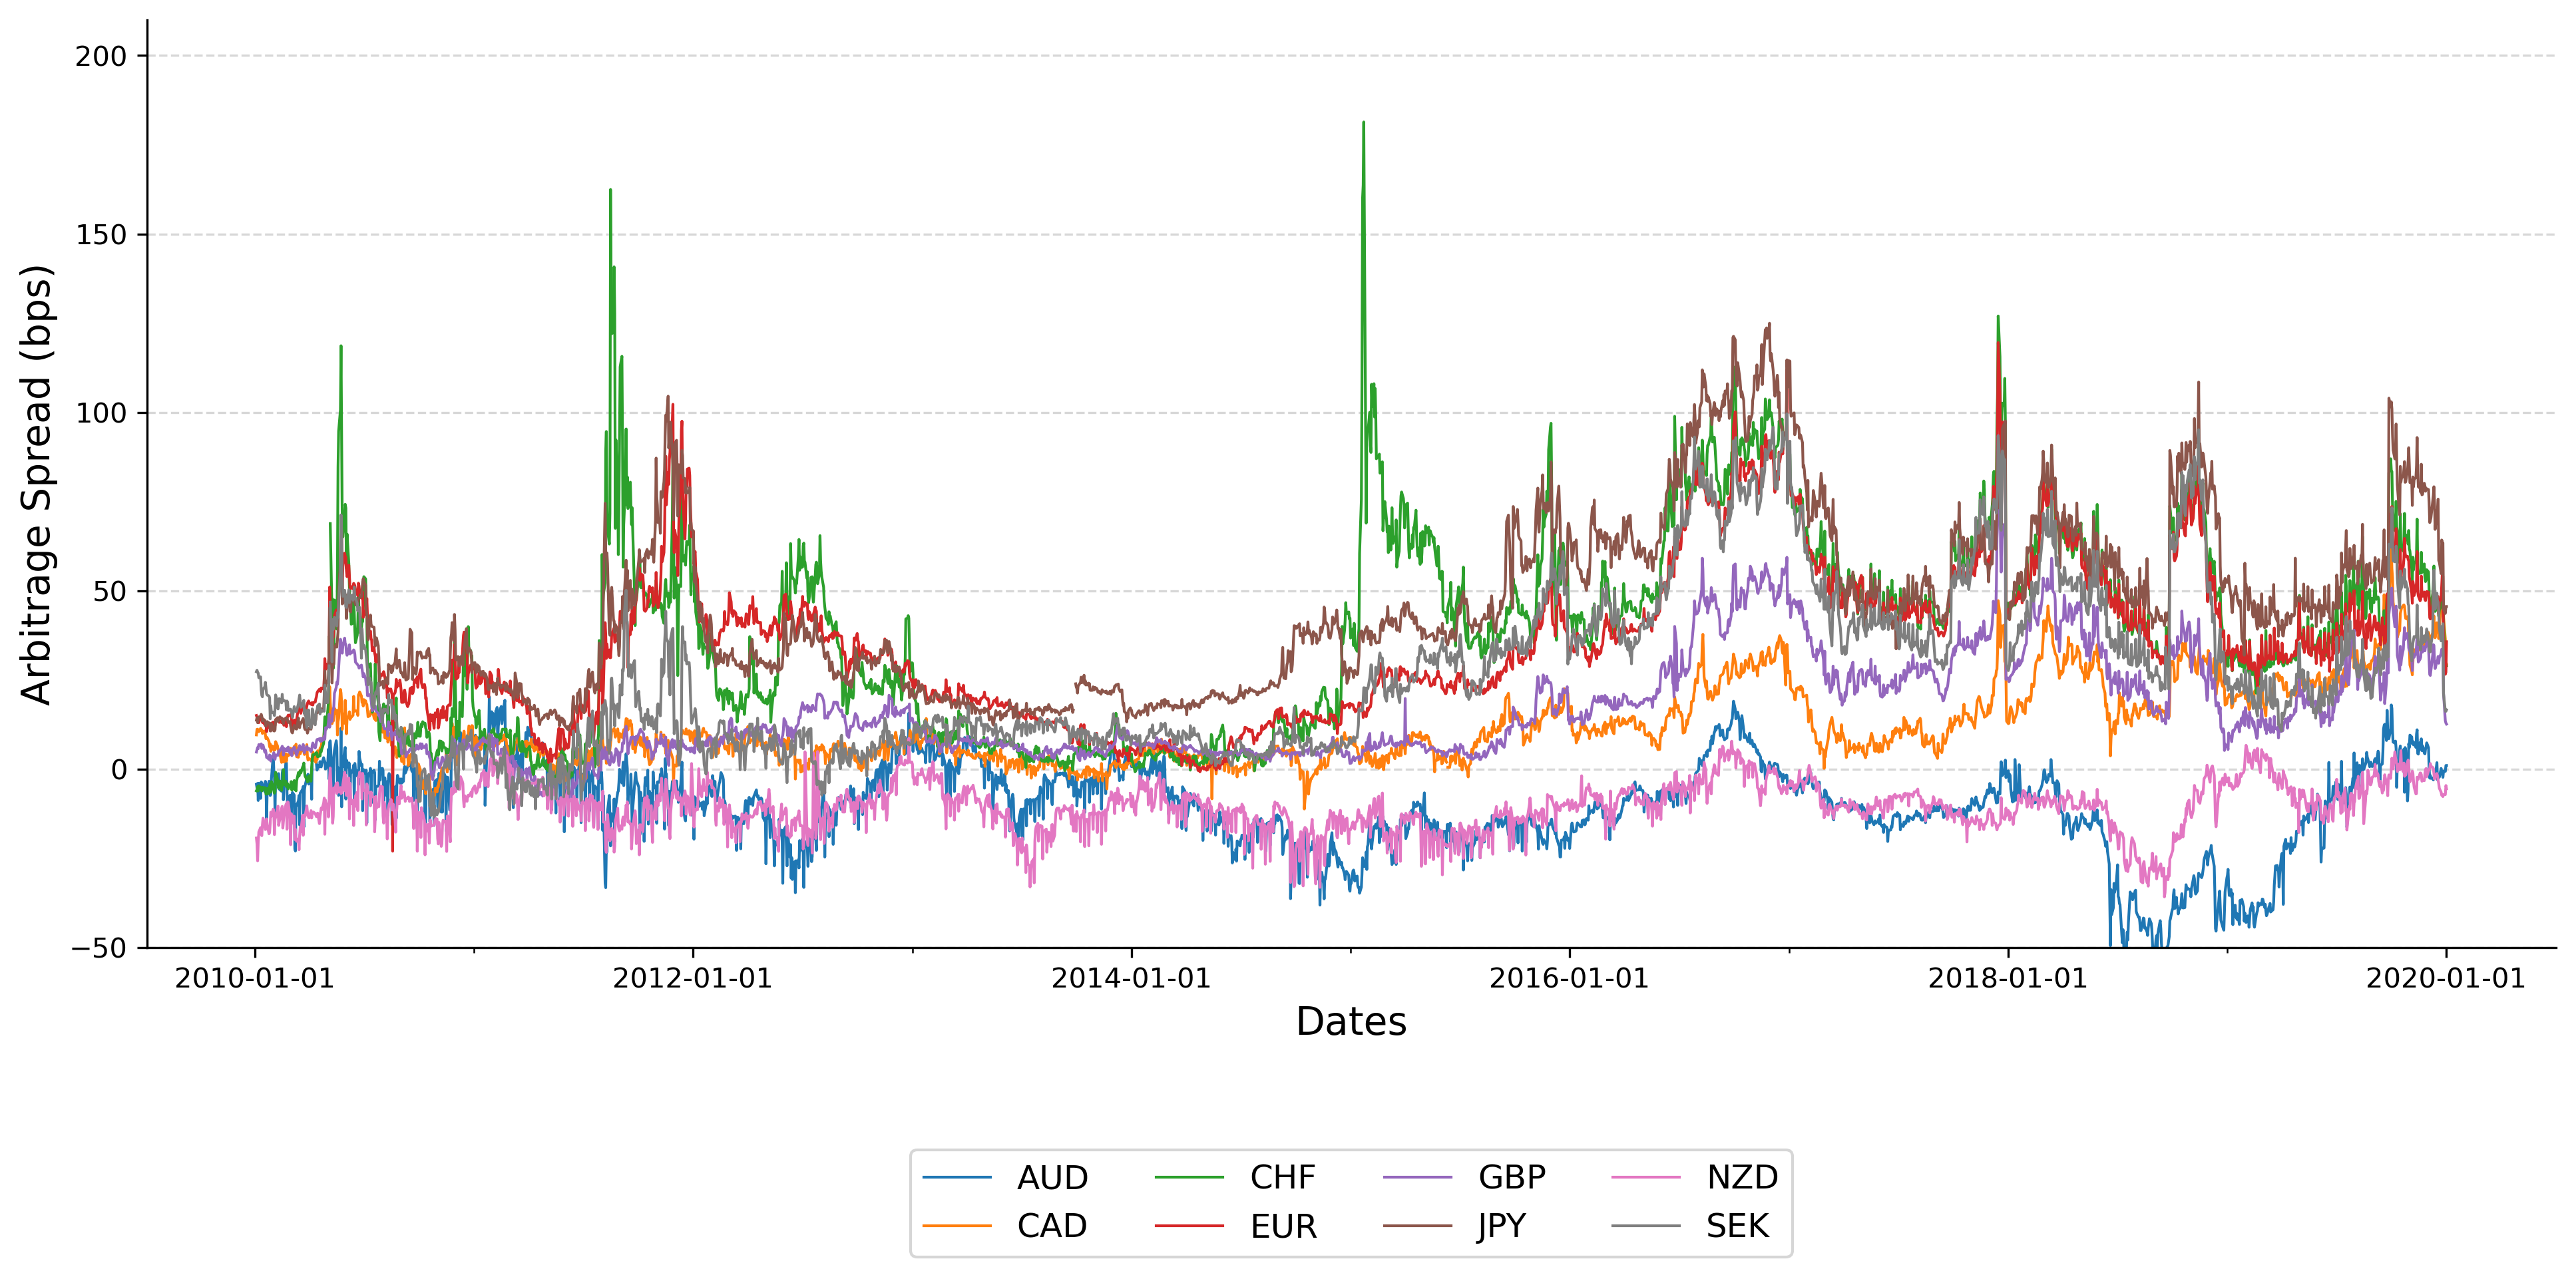

In [5]:
pull_bloomberg_cip_data.plot_cip(end = '2020-01-1')

<small>
Process to calculate the CIP and clean the data:

- Calculated logarithmic CIP deviations in basis points
- Multiplied deviations by 10,000
- Incorporated interest rates and annualized forward premium
- Applied 360/90 day count convention for 3-month forward premium
- Implemented 45-day rolling window outlier detection
- Removed extreme values exceeding 10× rolling mean absolute deviation
- Renamed and reorganized columns for clarity

## Load data to 2025

In [6]:
df_raw_2025 = pull_bloomberg_cip_data.load_raw(end = '2025-03-01')
display(df_raw_2025)

,AUD_CURNCY,CAD_CURNCY,CHF_CURNCY,EUR_CURNCY,GBP_CURNCY,JPY_CURNCY,NZD_CURNCY,SEK_CURNCY,AUD_CURNCY3M,CAD_CURNCY3M,...,SEK_CURNCY3M,AUD_IR,CAD_IR,CHF_IR,EUR_IR,GBP_IR,JPY_IR,NZD_IR,SEK_IR,USD_IR
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.095650,1.0416,1.0300,0.693866,0.621659,92.51,1.361656,7.0507,1.106054,1.041585,...,7.047486,3.90000,0.2525,-0.1315,0.385,0.44650,0.097500,2.56100,0.2530,0.16200
2010-01-05,1.096611,1.0390,1.0334,0.696136,0.625313,91.71,1.361285,7.1090,1.107072,1.038995,...,7.105937,3.90000,0.2650,-0.1350,0.379,0.44800,0.097500,2.53675,0.2600,0.15500
2010-01-06,1.087193,1.0324,1.0275,0.693963,0.624376,92.33,1.355381,7.0732,1.097580,1.032415,...,7.070264,3.91000,0.2640,-0.1300,0.377,0.44550,0.097500,2.54500,0.2515,0.14600
2010-01-07,1.089918,1.0347,1.0341,0.698910,0.627628,93.37,1.366120,7.1291,1.100576,1.034725,...,7.126259,3.95000,0.2620,-0.1285,0.373,0.44250,0.098000,2.54500,0.2550,0.14500
2010-01-08,1.081432,1.0299,1.0239,0.693914,0.624025,92.66,1.357773,7.0752,1.091894,1.029915,...,7.072649,3.95500,0.2540,-0.1225,0.371,0.44300,0.098000,2.54500,0.2550,0.14300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,1.574803,1.4260,0.8971,0.955292,0.792079,149.72,1.744287,10.6620,1.573792,1.420264,...,10.603541,4.07600,2.8595,0.2650,-0.487,4.42825,0.498395,3.62500,2.2150,4.33000
2025-02-25,1.576293,1.4313,0.8930,0.951113,0.789515,149.03,1.746420,10.5958,1.575274,1.425501,...,10.538092,4.07400,2.8430,0.2550,-0.487,4.42400,0.496250,3.62000,2.2110,4.33070
2025-02-26,1.586043,1.4338,0.8947,0.953743,0.788955,149.10,1.755926,10.6484,1.584964,1.428111,...,10.589045,4.07375,2.8625,0.2575,-0.487,4.42310,0.494000,3.61080,2.2210,4.33005


In [7]:
cip_table_2025 = pull_bloomberg_cip_data.compute_cip(end = '2025-01-01')
display(cip_table_2025)

,CIP_AUD_ln,CIP_CAD_ln,CIP_CHF_ln,CIP_EUR_ln,CIP_GBP_ln,CIP_JPY_ln,CIP_NZD_ln,CIP_SEK_ln
Date,,,,,,,,
2010-01-04,-4.226993,9.626041,-6.042240,15.055381,4.819995,13.747510,-19.271144,27.337808
2010-01-05,-5.232951,11.192493,-5.730217,14.518959,5.455976,14.405552,-20.925354,27.738205
2010-01-06,-3.963291,11.218834,-4.897695,14.049705,6.091737,13.046346,-25.658343,27.156964
2010-01-07,-8.744713,10.733548,-6.069802,13.153883,5.767415,14.025599,-20.573669,26.943478
2010-01-08,-3.907346,10.517423,-4.666879,13.056256,6.904410,14.671440,-17.573821,25.624808
...,...,...,...,...,...,...,...,...
2024-12-26,-0.766333,23.128393,24.550246,-310.423255,5.442398,33.221177,11.513906,15.338563
2024-12-27,-0.479475,22.250737,19.704683,-311.977620,4.505007,25.733427,12.095516,3.560293
2024-12-30,0.007007,19.622446,12.229501,-317.081539,3.395406,22.690483,11.731758,8.169759


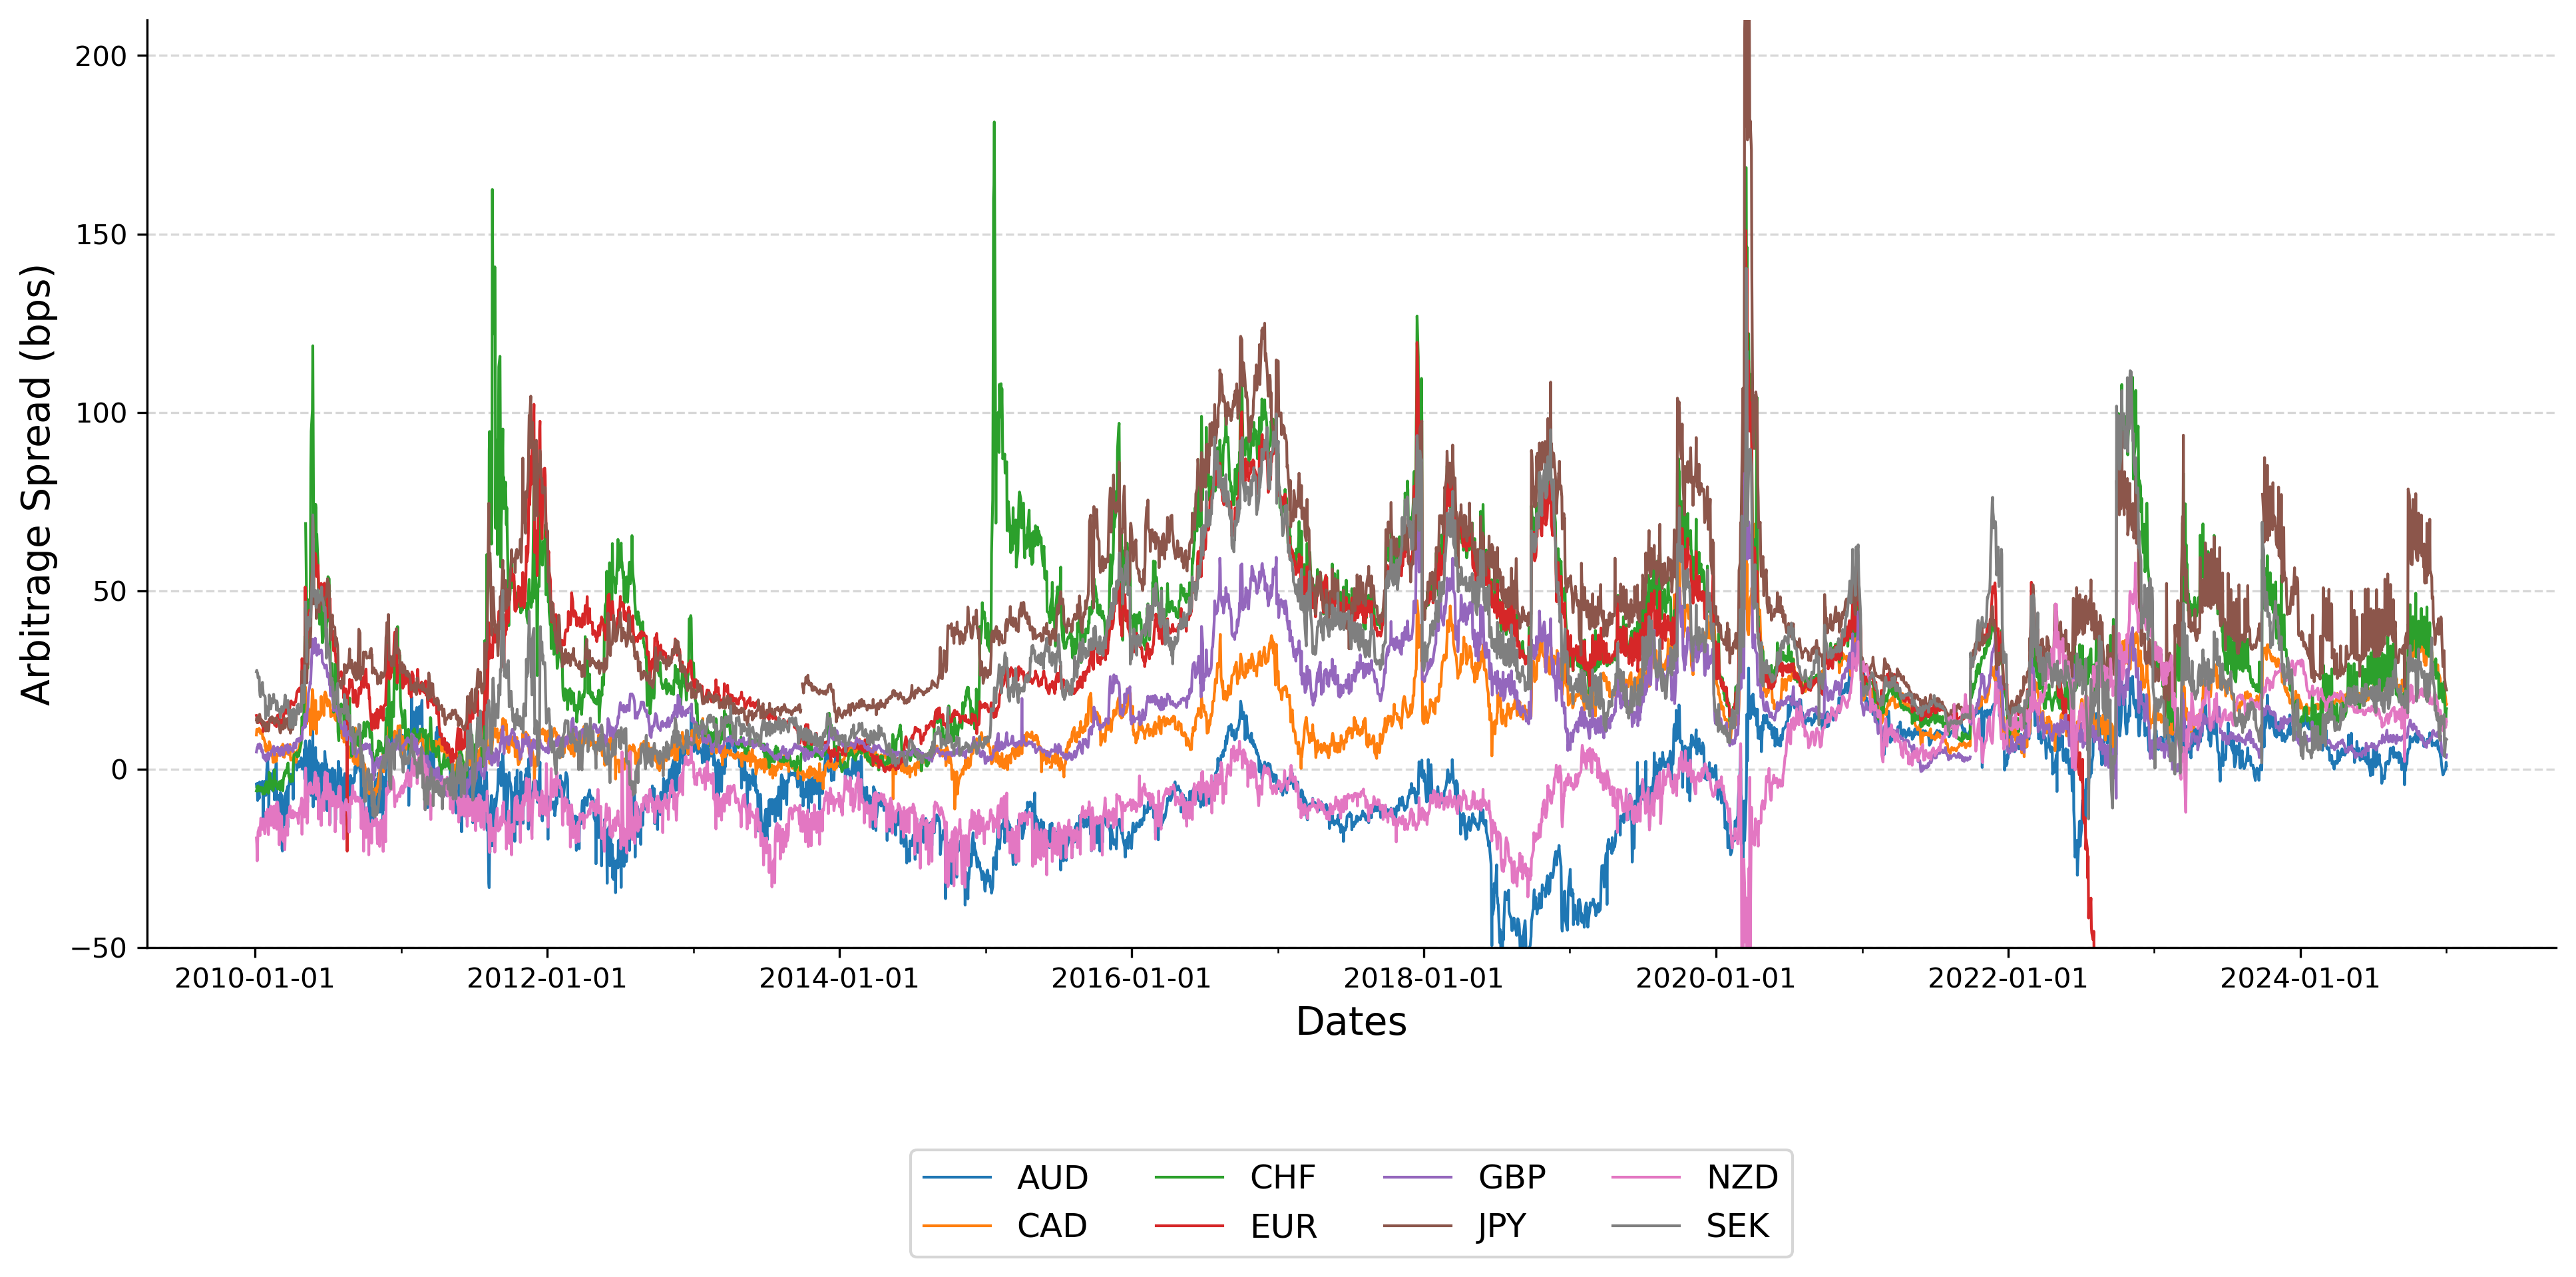

In [8]:
pull_bloomberg_cip_data.plot_cip(end = '2025-01-1')

### Summary Statistics

In [9]:
cip_table_2025.describe()

,CIP_AUD_ln,CIP_CAD_ln,CIP_CHF_ln,CIP_EUR_ln,CIP_GBP_ln,CIP_JPY_ln,CIP_NZD_ln,CIP_SEK_ln
count,3913.000000,3912.000000,3911.000000,3912.000000,3912.000000,3910.000000,3912.000000,3912.000000
mean,-3.878413,14.754186,35.236215,-27.378610,15.291702,43.566555,-1.836875,26.984328
std,14.504292,11.035695,25.699442,145.974489,13.049614,23.923805,15.500549,21.454702
min,-58.535205,-11.137506,-6.967368,-434.552925,-8.134689,10.110790,-65.252431,-13.915776
25%,-13.290635,6.010519,15.201344,11.887885,6.190546,26.741517,-12.438233,11.216853
50%,-2.543409,12.747893,31.143697,25.297203,10.703539,38.772292,-6.931293,22.609615
75%,7.482988,21.878968,49.382485,41.612333,21.168099,54.958727,10.140732,36.991435
max,59.935097,71.634896,181.363535,150.923367,105.965103,245.862433,57.824282,140.378499


<small> Our analysis revealed that the COVID period produced the most extreme spread variations in our sample, ranging from -50 to over 200 basis points. This extraordinary divergence created unique opportunities: currencies like NZD exhibited deeply negative spreads, making synthetic funding through government bonds particularly profitable. Conversely, EUR and CHF displayed strongly positive spreads, creating exploitable differences between actual risk-free rates.
It's worth noting that CHF demonstrated multiple volatility spikes throughout the sample period, attributable to the 2015 Swiss National Bank policy shock, persistent negative interest rate conditions, and its relatively thinner liquidity profile compared to other G10 currencies.

In [10]:
stats= cip_analysis.compute_cip_statistics(cip_table_2025)

In [11]:
cip_analysis.display_cip_summary(stats)


OVERALL CIP STATISTICS (in basis points)
       CIP_AUD_ln  CIP_CAD_ln  CIP_CHF_ln  CIP_EUR_ln  CIP_GBP_ln  CIP_JPY_ln  \
count     3913.00     3912.00     3911.00     3912.00     3912.00     3910.00   
mean        -3.88       14.75       35.24      -27.38       15.29       43.57   
std         14.50       11.04       25.70      145.97       13.05       23.92   
min        -58.54      -11.14       -6.97     -434.55       -8.13       10.11   
25%        -13.29        6.01       15.20       11.89        6.19       26.74   
50%         -2.54       12.75       31.14       25.30       10.70       38.77   
75%          7.48       21.88       49.38       41.61       21.17       54.96   
max         59.94       71.63      181.36      150.92      105.97      245.86   

       CIP_NZD_ln  CIP_SEK_ln  
count     3912.00     3912.00  
mean        -1.84       26.98  
std         15.50       21.45  
min        -65.25      -13.92  
25%        -12.44       11.22  
50%         -6.93       22.61  
75% 

In [12]:
cip_analysis.display_cip_corr(stats)


CORRELATION MATRIX
            CIP_AUD_ln  CIP_CAD_ln  CIP_CHF_ln  CIP_EUR_ln  CIP_GBP_ln  \
CIP_AUD_ln       1.000       0.291      -0.098      -0.321       0.035   
CIP_CAD_ln       0.291       1.000       0.506      -0.188       0.644   
CIP_CHF_ln      -0.098       0.506       1.000       0.154       0.731   
CIP_EUR_ln      -0.321      -0.188       0.154       1.000       0.298   
CIP_GBP_ln       0.035       0.644       0.731       0.298       1.000   
CIP_JPY_ln      -0.060       0.624       0.823       0.131       0.795   
CIP_NZD_ln       0.664       0.375      -0.050      -0.615      -0.061   
CIP_SEK_ln       0.075       0.630       0.789       0.173       0.842   

            CIP_JPY_ln  CIP_NZD_ln  CIP_SEK_ln  
CIP_AUD_ln      -0.060       0.664       0.075  
CIP_CAD_ln       0.624       0.375       0.630  
CIP_CHF_ln       0.823      -0.050       0.789  
CIP_EUR_ln       0.131      -0.615       0.173  
CIP_GBP_ln       0.795      -0.061       0.842  
CIP_JPY_ln       1.

In [13]:
cip_analysis.display_cip_max_min(stats)


EXTREME CIP DEVIATIONS
Most Positive CIP Deviation: CIP_JPY_ln (43.57 bps)
Most Negative CIP Deviation: CIP_EUR_ln (-27.38 bps)
